# PDF 로드 방법

`ISO 32000`으로 표준화된 `휴대용 문서 형식(Portable Document Format, PDF)`은 1992년 Adobe가 애플리케이션 소프트웨어, 하드웨어 및 운영 체제와 관계없이 독립적인 방식으로 텍스트 형식 및 이미지를 포함한 문서를 표시하기 위해 개발한 파일 형식이다.

배울 내용
-  PDF 파일을 LangChain `문서(Document)` 형식으로 로드하는 방법

PDF의 텍스트는 일반적으로 텍스트 상자를 통해 표시된다. 또한 이미지가 포함될 수도 있다. PDF 파서는 다음과 같은 조합을 수행할 수 있다.
- `휴리스틱(heuristics)` 또는 `ML 추론(inference)`을 통해 텍스트 상자를 줄, 문단 및 기타 구조로 응집시킨다.
- 이미지에서 `OCR`을 실행하여 텍스트를 감지한다.
- 텍스트를 단락, 목록, 표 또는 기타 구조로 분류한다.
- 텍스트를 테이블 행과 열 또는 키-값 쌍으로 구조화한다.

LangChain은 여러 PDF 파서와 통합된다. 일부는 간단하고 상대적으로 낮은 수준이며, 다른 일부는 OCR 및 이미지 처리(image-processing)를 지원하거나 고급 문서 레이아웃 분석(document layout analysis)을 수행한다.

## 참고
- https://en.wikipedia.org/wiki/Heuristic

In [1]:
file_path = (
    "./sample_data/정책자료_전차책_774호.pdf"
)

LLM은 멀티 모달 입력(예: 이미지)에 대한 추론을 지원한다. 복잡한 레이아웃, 다이어그램 또는 스캔을 사용하는 PDF에 대한 질의응답을 제공하는 일부 애플리케이션에서는 PDF 구문 분석을 건너뛰고 대신 PDF 페이지를 이미지에 캐스팅하여 모델에 직접 전달하는 것이 좋다. 아래의 멀티 모달 모델 사용 섹션에서 이에 대한 예를 시연한다.

# 간단하고 빠른 텍스트 추출



PDF의 텍스트를 문자열로 추출하기 위해서 아래 코드와 같이 `Document Loader`의 `load` 메소드를 호출하는 것이다. `load` 메소드는 페이지별로 `Document` 객체를 생성하여 `Document` 객체의 리스트를 반환한다. 페이지의 텍스트는 `Document` 객체의 `page_content` 속성에 저장된다. 하지만 이미지나 스캔본의 텍스트는 구문 분석되지 않아 문자열로 추출할 수 없다. 아래 코드는 `pypydf` 파이썬 라이브러리를 사용해 텍스트를 추출한다.

랭체인의 `document loader`는 `lazy_load` 메소드와 비동기방식인 `alazy_load` 메소드를 구현한다. 이 메소드들은 `Document` 객체의 `이터레이터(iterator)`를 반환한다.

In [2]:
pip install -qU pypdf

Note: you may need to restart the kernel to use updated packages.


In [3]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader(file_path)
pages = []
async for page in loader.alazy_load():
    pages.append(page)

In [4]:
print(f"{pages[0].metadata}")
print(pages[0].page_content)

{'source': './sample_data/정책자료_전차책_774호.pdf', 'page': 0}
제76주년 국군의 날
2년 연속 시가행진… ‘괴물 미사일’ 현무 –5 최초 공개강한 국군, 국민과 함께!
건군 76주년 국군의 날을 기념하는 행사가 ‘강한 국군, 국
민과 함께!’라는 주제로 10월 1일 열렸다. 이번 행사에는 
병력 5300여 명과 장비 340여 대( 83종)가 참가했다. 국군
통수권자인 윤석열 대통령을 비롯해 국회의장, 대법원장, 
헌법재판소장, 주한 외국대표단 등이 참석했다.
이날 오전 10시 경기 성남시 서울공항에서 ‘건군 76주년 
국군의 날 기념식’ 행사를 마친 병력과 장비는 오후 4시부
터 서울 숭례문을 출발해 광화문까지 국민의 환호 속에 시
가행진했다.
서울공항 기념식에는 5100만 국민을 대표하는 의미를 
담아 사전 신청을 거쳐 추첨으로 선정된 시민 5100명이 초
청됐다. 서울공항 활주로를 행진하는 국군 장병을 바로 눈
앞에서 지켜본 참가자들은 태극기를 흔들며 환호했다. 활
주로와 관람석의 거리는 20m에 불과했다.
이날 윤 대통령은 국방 분야의 핵심 국정과제 중 하나인 
전략사령부(전략사)의 창설( 10월 1일)을 기념하기 위해 전략
사 부대기를 진영승(공군 중장) 전략사령관에게 수여했다. 
전략사는 고도화되는 북한의 핵 · 미사일 위협에 맞서고
자 우리 군이 보유한 전략무기(미사일, 잠수함, 스텔스 전
투기 등)로 대응하기 위해 만든 부대다. ‘괴물 미사일’이라
는 별칭이 붙은 ‘현무- 5’도 전략사에서 운용한다.
“대한민국, 국군의 헌신과 희생 위에 건설”
윤 대통령은 국방부 장관, 각 군 참모총장과 함께 지붕이 
없는 사열차에 탑승해 활주로에 늘어선 우리 군 장병과 장
비를 사열한 후 단상으로 이동해 국가를 위해 헌신한 이들에게 훈장과 정부 포상을 수여했다. 보국훈장 천수장은 육
군 7보병사단장인 김진호 소장이 받았다. 보국훈장은 국
가안전보장에 기여한 이들에게 수여한다. 미 8군사령부 폴 
스텔리 육군 대령은 한미동맹

각 문서의 메타데이터에는 해당 페이지 번호가 저장되어 있다.

## PDF 벡터 검색

In [5]:
pip install -qU langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [6]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Open AI API Key: ")

In [7]:
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import OpenAIEmbeddings

vector_store = InMemoryVectorStore.from_documents(
    pages, 
    OpenAIEmbeddings(model="text-embedding-3-small")
)
docs = vector_store.similarity_search("2070년 이후 한국의 인구수는?", k=2)
for doc in docs:
    print(f'Page {doc.metadata["page"]}: {doc.page_content[:300]}\n')

Page 8: 인포그래픽으로 보는 대한민국
2072년 세계 인구는 102억 2000만 명으로 증가하는 반면 
우리나라 인구는 3600만 명 수준으로 감소할 것이라는 분
석이 나왔다. 같은 기간 한국 인구 2명 중 1명은 65세 이
상 노인일 것이라는 전망이다. 이에 따라 생산연령인구
(15~64세)가 부담해야 하는 노년부양비는 네 배 가까이 
증가할 것으로 보인다. 통계청은 9월 23일 이 같은 내용의 
‘2022년 기준 장래인구추계를 반영한 세계와 한국의 인구 
현황 및 전망’을 발표했다. 세계와 한국의 인구 현황과 전
망에 대해 살펴볼 수 있

Page 9: +고령인구)의 비율을 뜻한다. 특히 노년부양비는 더욱 빠
르게 증가해 같은 기간 27.4명에서 104.2명으로 네 배 가까
이 늘어난다. 홍콩( 158.4명), 푸에르토리코( 119.3명)에 이
어 세계에서 세 번째로 높은 숫자다.
기대수명 82.7세… 50년새 유럽 앞질러
이 같은 분석은 우리나라 합계출산율이 빠르게 줄어들고 
있다는 점에서 기인했다. 합계출산율이란 한 여성이 가임 
기간 동안 낳을 것으로 예상되는 평균 출생아 수를 의미한
다. 2023년 우리나라의 합계출산율은 0.72명에 그쳤다. 특
히 1970년 4.53명과 



# 레이아웃 분석과 이미지의 텍스트 추출

텍스트를 개별 단락, 제목, 표 또는 기타 구조로 세분화하거나 이미지에서 텍스트를 추출해야 하는 경우 아래 방법이 적절합니다. 

각 개체는 페이지의 구조를 나타내는 Document 개체 목록을 반환합니다. Document의 메타데이터에는 페이지 번호 및 개체와 관련된 기타 정보가 저장됩니다(예: 테이블 개체의 경우 테이블 행과 열을 저장할 수 있습니다).

`langchain-unstructured` 라이브러리를 사용한다. Unstructured는 PDF 구분 분석을 위한 파라미터를 제공한다.

- `strategy` (`fast` 또는 `hi-res`)
- API 또는 로컬 프로세싱 (API를 사용하기 위해서는 API 키가 필요하다)

`hi-res` 전략은 `문서 레이아웃 분석`과 `OCR`을 지원한다. 아래 코드에서 API를 사용해 이를 시연한다.

In [8]:
pip install -qU langchain-unstructured

Note: you may need to restart the kernel to use updated packages.


In [9]:
import getpass
import os

if "UNSTRUCTURED_API_KEY" not in os.environ:
    os.environ["UNSTRUCTURED_API_KEY"] = getpass.getpass("Unstructured API Key: ")

In [10]:
from langchain_unstructured import UnstructuredLoader

loader = UnstructuredLoader(
    file_path=file_path,
    strategy="hi_res",
    partition_via_api=True,
    coordinates=True,
)

docs = []
for doc in loader.lazy_load():
    docs.append(doc)

INFO: Preparing to split document for partition.
INFO: Starting page number set to 1
INFO: Allow failed set to 0
INFO: Concurrency level set to 5
INFO: Splitting pages 1 to 13 (13 total)
INFO: Determined optimal split size of 3 pages.
INFO: Partitioning 4 files with 3 page(s) each.
INFO: Partitioning 1 file with 1 page(s).
INFO: Partitioning set #1 (pages 1-3).
INFO: Partitioning set #2 (pages 4-6).
INFO: Partitioning set #3 (pages 7-9).
INFO: Partitioning set #4 (pages 10-12).
INFO: Partitioning set #5 (pages 13-13).
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: HTTP Request: POST https://api.unstructuredapp.io/general/v0/general "HTTP/1.1 200 OK"
INFO: Succe

여기서는 13페이지 분량의 문서에서 346개의 개별 구조를 복구한다.

In [11]:
print(len(docs))

346


In [12]:
first_page_docs = [doc for doc in docs if doc.metadata.get("page_number") == 1]

for doc in first_page_docs:
    print(doc.page_content)

제76주년 국군의 날
강한 국군, 국민과 함께! 2년 연속 시가행진… ‘괴물 미사일’ 현무–5 최초 공개
건군 76주년 국군의 날을 기념하는 행사가 ‘강한 국군, 국 민과 함께!’라는 주제로 10월 1일 열렸다. 이번 행사에는 병력 5300여 명과 장비 340여 대(83종)가 참가했다. 국군 통수권자인 윤석열 대통령을 비롯해 국회의장, 대법원장, 헌법재판소장, 주한 외국대표단 등이 참석했다.
f‘
이날 오전 10시 경기 성남시 서울공항에서 ‘건군 76주년 국군의 날 기념식’ 행사를 마친 병력과 장비는 오후 4시부 터 서울 숭례문을 출발해 광화문까지 국민의 환호 속에 시 가행진했다.
서울공항 기념식에는 5100만 국민을 대표하는 의미를 담아 사전 신청을 거쳐 추첨으로 선정된 시민 5100명이 초 청됐다. 서울공항 활주로를 행진하는 국군 장병을 바로 눈 앞에서 지켜본 참가자들은 태극기를 흔들며 환호했다. 활 주로와 관람석의 거리는 20m에 불과했다.
이날 윤 대통령은 국방 분야의 핵심 국정과제 중 하나인 전략사령부(전략사)의 창설(10월 1일)을 기념하기 위해 전략 사 부대기를 진영승(공군 중장) 전략사령관에게 수여했다.
전략사는 고도화되는 북한의 핵·미사일 위협에 맞서고 자 우리 군이 보유한 전략무기(미사일, 잠수함, 스텔스 전 투기 등)로 대응하기 위해 만든 부대다. ‘괴물 미사일’이라 는 별칭이 붙은 ‘현무-5’도 전략사에서 운용한다.
“대한민국, 국군의 헌신과 희생 위에 건설”
;
윤 대통령은 국방부 장관, 각 군 참모총장과 함께 지붕이 없는 사열차에 탑승해 활주로에 늘어선 우리 군 장병과 장 비를 사열한 후 단상으로 이동해 국가를 위해 헌신한 이들
28
에게 훈장과 정부 포상을 수여했다. 보국훈장 천수장은 육 군 7보병사단장인 김진호 소장이 받았다. 보국훈장은 국 가안전보장에 기여한 이들에게 수여한다. 미 8군사령부 폴 스텔리 육군 대령은 한미동맹에 기여한 공로로 표창을 받 았다. 대통령 부대 표창도 이뤄졌는데 올해는 육군 제11기 동사단, 공군 제19전

## 테이블과 기타 구조 추출하기

우리가 로드한 각각의 `Document` 객체는 제목, 문단, 또는 테이블 같은 구조를 나타낸다. 인덱싱과 질의응답 작업을 위해 페이지의 구조는 다음과 같이 되어야 한다.

- 분류(classification)
- 구조화된 표현(structured representation)

아래 코드는 테이블을 식별하고 추출하는 코드다.

In [13]:
pip install -qU matplotlib PyMuPDF pillow

Note: you may need to restart the kernel to use updated packages.


In [14]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image

def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap() # 페이지를 픽셀 집합으로 변환
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples) # 픽셀 데이터로 이미지 메모리 생성

    fig, ax = plt.subplots(1, figsize=(10,10))  # figure와 subplot 객체 생성
    ax.imshow(pil_image)

    # 영역별 카테고리 지정
    categories = set()
    category_to_color = {
        "Title": "orchid",
        "Image": "forestgreen",
        "Table": "tomato",
    }

    # 영역별로 박스 표시 추가
    for segment in segments:
        points = segment["coordinates"]["points"]
        layout_width = segment["coordinates"]["layout_width"]
        layout_height = segment["coordinates"]["layout_height"]
        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height) for x, y in points
        ]
        
        box_color = category_to_color.get(
            segment["category"], "deepskyblue"
        )
        categories.add(segment["category"])
        rect = patches.Polygon(
            scaled_points, linewidth=1, edgecolor=box_color, facecolor="none"
        )
        ax.add_patch(rect)

    # 페이지 상단 오른쪽에 카테고리명 표시
    legend_handles = [patches.Patch(color="deepskyblue", label="Text")]
    for category in ["Title", "Image", "Table"]:
        if category in categories:
            legend_handles.append(
                patches.Patch(
                    color=category_to_color[category],
                    label=category
                )
            )
    ax.axis("off")
    ax.legend(handles=legend_handles, loc="upper right")

    plt.tight_layout()
    plt.show()

def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [
        doc for doc in doc_list if doc.metadata.get("page_number") == page_number
    ]

    segments = [doc.metadata for doc in page_docs]
    plot_pdf_with_boxes(pdf_page, segments)
    if print_text:
        for doc in page_docs:
            print(f"{doc.page_content}\n")

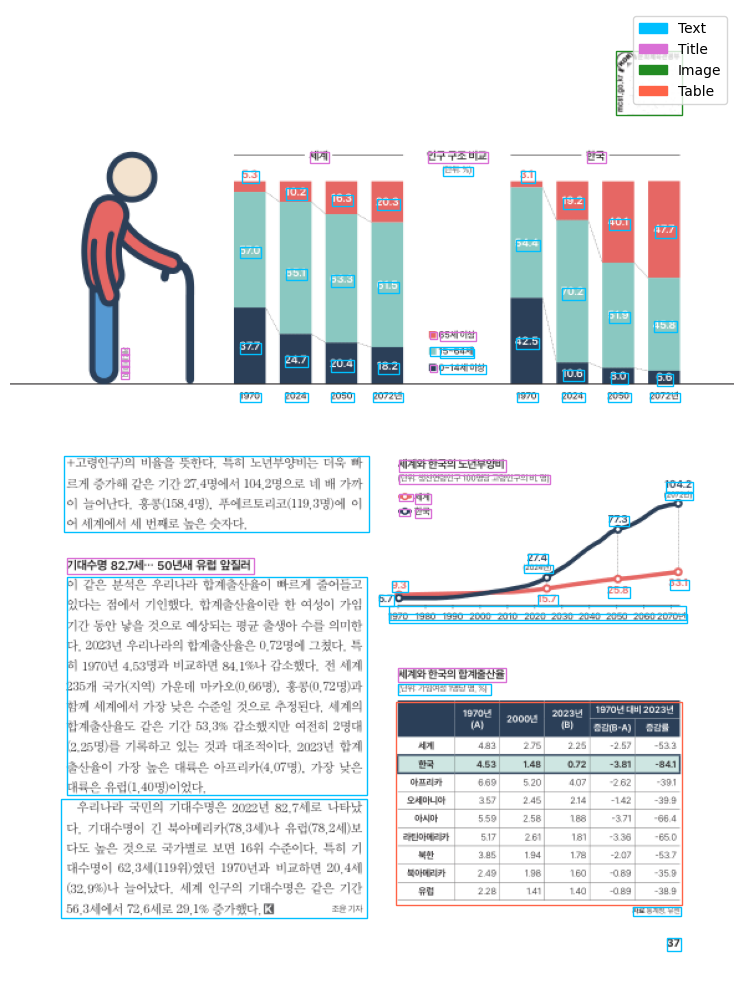

°t BHASTBL mcsi.go.ki

게

티

이

미

지

5.3

57.0

37.7

1970

10.2

65.1

24.7

2024

세계

16.3

63.3

20.4

2050

20.3

61.5

18.2

2072년

인구 구조 비교

(단위: %)

M

65세 이상

1115~64M|

15~64세

W

0~14세 이상

3.1

54.4

42.5

1970

19.2

70.2

10.6

2024

한국

40.1

51.9

8.0

2050

47.7

45.8

6.6

2072년

+고령인구)의 비율을 뜻한다. 특히 노년부양비는 더욱 빠 르게 증가해 같은 기간 27.4명에서 104.2명으로 네 배 가까 이 늘어난다. 홍콩(158.4명), 푸에르토리코(119.3명)에 이 어 세계에서 세 번째로 높은 숫자다.

세계와 한국의 노년부양비

(단위: 생산연령인구 100명당 고령인구의 비, 명)

<O

O

세계

한국

77.3

104.2

(2072년)

기대수명 82.7세… 50년새 유럽 앞질러

이 같은 분석은 우리나라 합계출산율이 빠르게 줄어들고 있다는 점에서 기인했다. 합계출산율이란 한 여성이 가임 기간 동안 낳을 것으로 예상되는 평균 출생아 수를 의미한 다. 2023년 우리나라의 합계출산율은 0.72명에 그쳤다. 특 히 1970년 4.53명과 비교하면 84.1%나 감소했다. 전 세계 235개 국가(지역) 가운데 마카오(0.66명), 홍콩(0.72명)과 함께 세계에서 가장 낮은 수준일 것으로 추정된다. 세계의 합계출산율도 같은 기간 53.3% 감소했지만 여전히 2명대 (2.25명)를 기록하고 있는 것과 대조적이다. 2023년 합계 출산율이 가장 높은 대륙은 아프리카(4.07명), 가장 낮은 대륙은 유럽(1.40명)이었다.

우리나라 국민의 기대수명은 2022년 82.7세로 나타났 다. 기대수명이 긴 북아메리카(78.3세)나 유럽(78.2세)보 다도 높은 것으로 국가별로 보면 16위 수준이다. 특히 기 대수명이

In [15]:
render_page(docs, 10)

- https://pymupdf.readthedocs.io/en/latest/pixmap.html
- https://pillow.readthedocs.io/en/stable/
- https://pillow.readthedocs.io/en/stable/reference/Image.html
- https://wikidocs.net/141561

테이블의 내용은 문자열로 표현되고 `Document` 객체의 `page_content에` 저장된다. 그리고 `metadata`는 테이블의 열과 행의 정보를 가진다. 아래 코드는 category가 table인 Document의 metadata를 가지고 HTML로 표시하면 테이블이 나타난다.

In [16]:

from IPython.display import HTML, display

segments = [
    doc.metadata 
    for doc in docs
    if doc.metadata.get("page_number") == 10 and doc.metadata.get("category") == "Table"
]

display(HTML(segments[0]["text_as_html"]))

In [17]:
print(segments[0])

{'source': './sample_data/정책자료_전차책_774호.pdf', 'coordinates': {'points': [[859.1668090820312, 1546.297119140625], [859.1668090820312, 1998.7890625], [1498.51123046875, 1998.7890625], [1498.51123046875, 1546.297119140625]], 'system': 'PixelSpace', 'layout_width': 1615, 'layout_height': 2166}, 'text_as_html': '<table><thead><tr><th></th><th rowspan="2">I</th><th rowspan="2"></th><th rowspan="2">20234 (B)</th><th colspan="2">1970L4 LMHI 202344</th></tr><tr><th></th><th>증감(B-A) 증감률</th><th></th></tr></thead><tbody><tr><td>MlA</td><td>483</td><td>2.75</td><td>225</td><td>-2.57</td><td>-533</td></tr><tr><td>한국</td><td>4.53</td><td>1.48</td><td>0.72</td><td>-3.81</td><td>-84.1</td></tr><tr><td>otza|7}</td><td>6.69</td><td>5.20</td><td>4.07</td><td>-2.62</td><td>-391</td></tr><tr><td>lotLlot</td><td>357</td><td>245</td><td>214</td><td>-142</td><td>-39.9</td></tr><tr><td>OfAlof</td><td>5.59</td><td>258</td><td>188</td><td>-371</td><td>-66.4</td></tr><tr><td>2telotmi2|zt</td><td>517</td><td>261</

## 특정 구역의 텍스트 추출하기

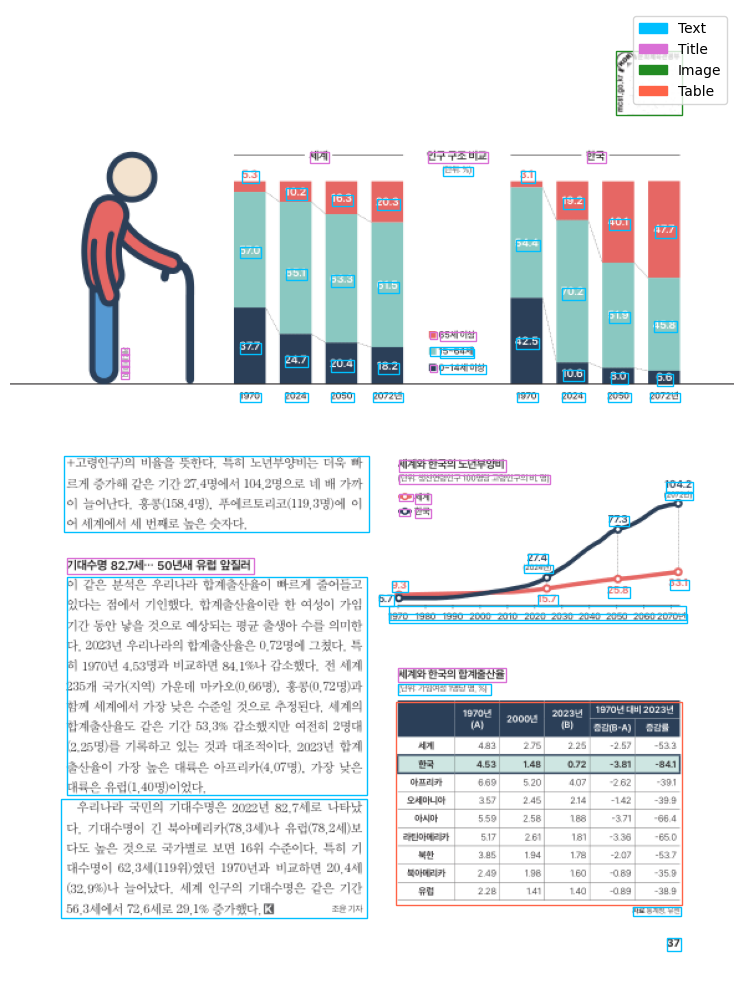

In [18]:
render_page(docs, 10, print_text=False)

In [19]:
title_docs = []
parent_id = -1
for doc in docs:
    if doc.metadata["category"] == "Title":
        parent_id = doc.metadata["element_id"]
    if doc.metadata.get("parent_id") == parent_id:
        title_docs.append(doc)


for doc in title_docs:
    print(doc.page_content)

건군 76주년 국군의 날을 기념하는 행사가 ‘강한 국군, 국 민과 함께!’라는 주제로 10월 1일 열렸다. 이번 행사에는 병력 5300여 명과 장비 340여 대(83종)가 참가했다. 국군 통수권자인 윤석열 대통령을 비롯해 국회의장, 대법원장, 헌법재판소장, 주한 외국대표단 등이 참석했다.
f‘
이날 오전 10시 경기 성남시 서울공항에서 ‘건군 76주년 국군의 날 기념식’ 행사를 마친 병력과 장비는 오후 4시부 터 서울 숭례문을 출발해 광화문까지 국민의 환호 속에 시 가행진했다.
서울공항 기념식에는 5100만 국민을 대표하는 의미를 담아 사전 신청을 거쳐 추첨으로 선정된 시민 5100명이 초 청됐다. 서울공항 활주로를 행진하는 국군 장병을 바로 눈 앞에서 지켜본 참가자들은 태극기를 흔들며 환호했다. 활 주로와 관람석의 거리는 20m에 불과했다.
이날 윤 대통령은 국방 분야의 핵심 국정과제 중 하나인 전략사령부(전략사)의 창설(10월 1일)을 기념하기 위해 전략 사 부대기를 진영승(공군 중장) 전략사령관에게 수여했다.
전략사는 고도화되는 북한의 핵·미사일 위협에 맞서고 자 우리 군이 보유한 전략무기(미사일, 잠수함, 스텔스 전 투기 등)로 대응하기 위해 만든 부대다. ‘괴물 미사일’이라 는 별칭이 붙은 ‘현무-5’도 전략사에서 운용한다.
;
윤 대통령은 국방부 장관, 각 군 참모총장과 함께 지붕이 없는 사열차에 탑승해 활주로에 늘어선 우리 군 장병과 장 비를 사열한 후 단상으로 이동해 국가를 위해 헌신한 이들
국군의 날 행사를 책임지는 제병지휘부가 행렬 선두에 서 자 분열이 시작됐다. 분열은 사열과 달리 장병과 장비가 대통령 앞을 지나가며 군기와 사기를 뽐내는 행사다. 군악 대의 음악에 맞춰 국군 장병들이 활주로를 힘차게 박차며 행진을 시작했다. 미래 전쟁에 대비한 유인·무인 복합 전 투 체계도 모습을 드러냈다. ‘다족보행로봇’도 등장했다. 외형이 개와 닮아 ‘로봇 개’라고도 한다. 여기에 현대전의 필수 무기가 된 무인기(드론), 무인잠수정, 무인헬기 등도 행렬에

## 이미지의 텍스트 추출하기

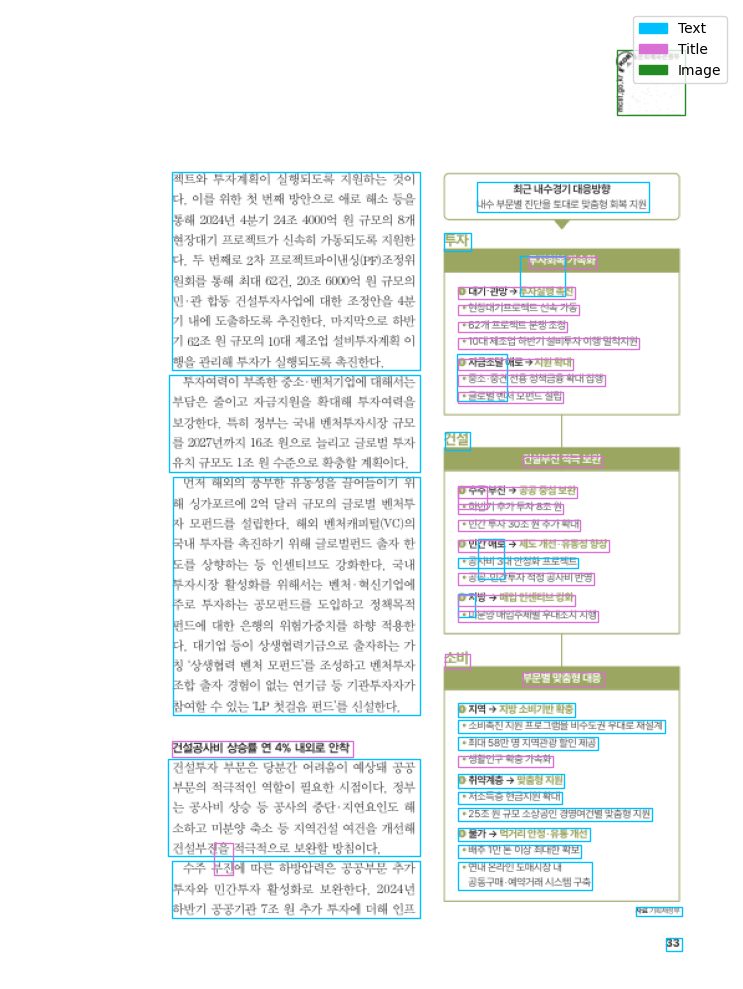

Iy 067 150w HERSkEENS

젝트와 투자계획이 실행되도록 지원하는 것이 다. 이를 위한 첫 번째 방안으로 애로 해소 등을 통해 2024년 4분기 24조 4000억 원 규모의 8개 현장대기 프로젝트가 신속히 가동되도록 지원한 다. 두 번째로 2차 프로젝트파이낸싱(PF)조정위 원회를 통해 최대 62건, 20조 6000억 원 규모의 민·관 합동 건설투자사업에 대한 조정안을 4분 기 내에 도출하도록 추진한다. 마지막으로 하반 기 62조 원 규모의 10대 제조업 설비투자계획 이 행을 관리해 투자가 실행되도록 촉진한다.

투자여력이 부족한 중소·벤처기업에 대해서는 부담은 줄이고 자금지원을 확대해 투자여력을 보강한다. 특히 정부는 국내 벤처투자시장 규모 를 2027년까지 16조 원으로 늘리고 글로벌 투자 유치 규모도 1조 원 수준으로 확충할 계획이다.

먼저 해외의 풍부한 유동성을 끌어들이기 위 해 싱가포르에 2억 달러 규모의 글로벌 벤처투 자 모펀드를 설립한다. 해외 벤처캐피털(VC)의 국내 투자를 촉진하기 위해 글로벌펀드 출자 한 도를 상향하는 등 인센티브도 강화한다. 국내 투자시장 활성화를 위해서는 벤처·혁신기업에 주로 투자하는 공모펀드를 도입하고 정책목적 펀드에 대한 은행의 위험가중치를 하향 적용한 다. 대기업 등이 상생협력기금으로 출자하는 가 칭 ‘상생협력 벤처 모펀드’를 조성하고 벤처투자 조합 출자 경험이 없는 연기금 등 기관투자자가 참여할 수 있는 ‘LP 첫걸음 펀드’를 신설한다.

건설공사비 상승률 연 4% 내외로 안착

건설투자 부문은 당분간 어려움이 예상돼 공공 부문의 적극적인 역할이 필요한 시점이다. 정부 는 공사비 상승 등 공사의 중단·지연요인도 해 소하고 미분양 축소 등 지역건설 여건을 개선해 건설부진을 적극적으로 보완할 방침이다.

Z‘E

수주 부진에 따른 하방압력은 공공부문 추가 투자와 민간투자 활성화로 보완한다. 2024년 하반기 공공기관 7조 원 추가 투자에 더해 인프

최근 내수경기 대응방향 내수 부문별 진단을 토대로 맞춤형 

In [22]:
render_page(docs, 6)

# 멀티모달 모델 사용

LLM은 멀티 모달 입력(예: 이미지)에 대한 추론을 지원한다. 복잡한 레이아웃, 다이어그램 또는 스캔을 사용하는 PDF에 대한 질의응답을 제공하는 일부 애플리케이션에서는 PDF 구문 분석을 건너뛰고 대신 PDF 페이지를 이미지에 캐스팅하여 모델에 직접 전달하는 것이 좋다.

이를 통해 모델은 `1차원(one-dimensional)` 문자열 표현 대신 페이지의 `2차원(two-dimensional)` 콘텐츠에 대해 추론할 수 있다.

원칙적으로 멀티모달 입력을 지원하는 모든 LangChain 채팅 모델을 사용할 수 있다. 아래에서는 OpenAI의 `gpt-4o-mini`를 사용합니다.

먼저 PDF 페이지를 base64로 인코딩된 이미지로 변환하는 유틸리티 함수를 정의한다.
## 참고
- https://python.langchain.com/docs/integrations/chat/

In [23]:
pip install -qU PyMuPDF pillow langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [24]:
import base64
import io
import fitz
from PIL import Image

def pdf_page_to_base64(pdf_path: str, page_number: int):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_number - 1)
    pix = page.get_pixmap()
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    buffer = io.BytesIO()
    img.save(buffer, format="PNG")

    return base64.b64encode(buffer.getvalue()).decode("utf-8")

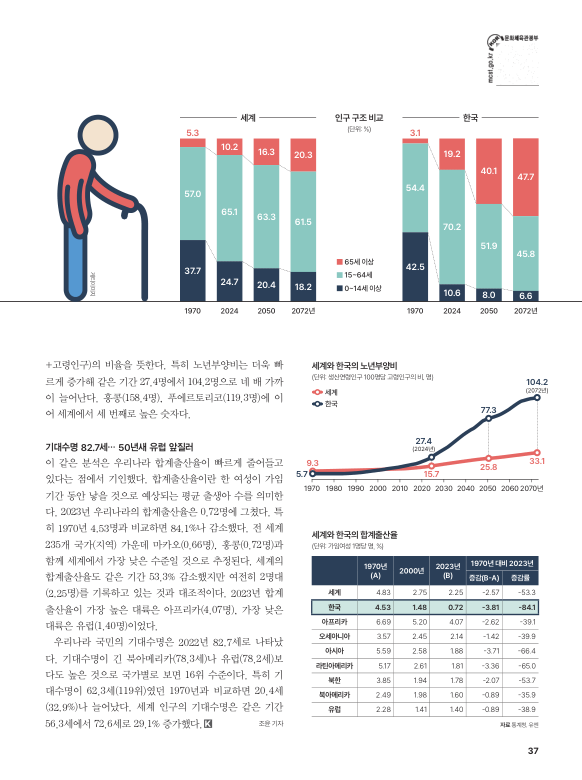

In [25]:
from IPython.display import Image as IPImage
from IPython.display import display

base64_image = pdf_page_to_base64(file_path, 10)
display(IPImage(data=base64.b64decode(base64_image)))

In [32]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")

In [36]:
from langchain_core.messages import HumanMessage

query = "1970년 대한민국의 합계출산율은 얼마야?"

message = HumanMessage(
    content=[
        {"type": "text", "text": query},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
        },
    ],
)

response = llm.invoke([message])
print(response.content)

INFO: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


1970년 대한민국의 합계출산율은 4.53입니다.


## 참고
- https://python.langchain.com/docs/integrations/document_loaders/#pdfs